### **Description**:Learn how to use Linear Regression in Tensorflow

I used a Auto Mpg dataset to find the mileage of different vehicles.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)

In [4]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# clean data
dataset = dataset.dropna()

#convert categorical 'Origin' data into one-hot data
origin = dataset.pop('Origin')
dataset['USA'] = (origin==1) * 1
dataset['Europe'] = (origin==2) * 1
dataset['Japan'] = (origin==3) * 1

In [6]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [7]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [8]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [9]:
def plot(feature, x=None, y=None):
  plt.figure(figsize=(10, 8))
  plt.scatter(train_features[feature], train_labels, label='Data')
  if x is not None and y is not None:
    plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(feature)
  plt.ylabel('MPG')
  plt.legend()

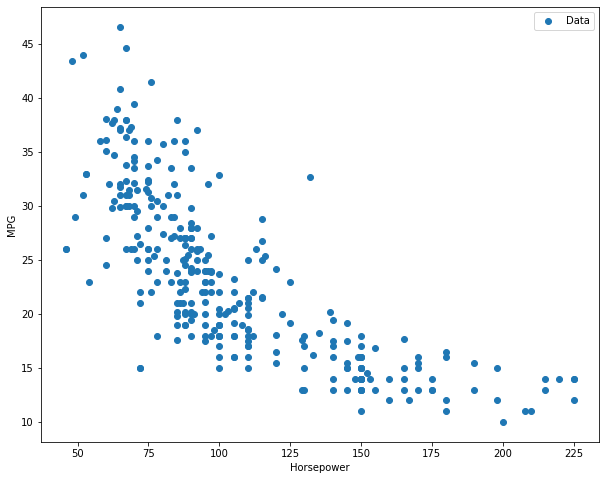

In [10]:
plot('Horsepower')

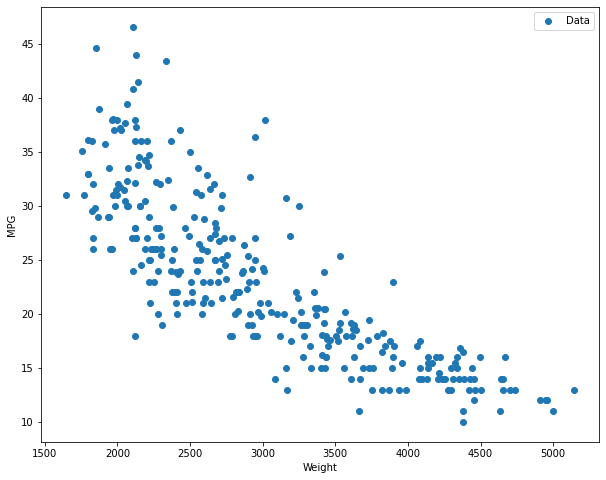

In [11]:
plot('Weight')

In [12]:
 # Normalize
 print(train_dataset.describe().transpose()[['mean', 'std']])

 # Normalization
 normalizer = preprocessing.Normalization()

 # adapt to the data
 normalizer.adapt(np.array(train_features))
 print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
    0.197]


In [13]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input - mean) / stddev
first = np.array(train_features[:1])
print('First Example:', first)
print('Normalized:', normalizer(first).numpy())

First Example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [14]:
# Regression
  # 1. Normalize the input horsepower
  # 2. Apply a linear transformation ( y = m*x+b ) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = preprocessing.Normalization()

# adapt to the data
single_feature_normalizer.adapt(np.array(single_feature))
print(normalizer.mean.numpy)

(314,) (314, 9)
<bound method BaseResourceVariable.numpy of <tf.Variable 'mean:0' shape=(9,) dtype=float32, numpy=
array([   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
          0.624,    0.178,    0.197], dtype=float32)>>


In [15]:
# Sequential model
single_feature_model = keras.Sequential(
    [
     single_feature_normalizer,
     layers.Dense(units=1)
    ]
)

In [16]:
single_feature_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [17]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # or MeanSquaredEror
optim = keras.optimizers.Adam(learning_rate=0.01)

single_feature_model.compile(
    optimizer = optim,
    loss = loss
)

In [18]:
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2
)

Epoch 1/100
8/8 [==============================] - 0s 18ms/step - loss: 23.1696 - val_loss: 23.6564
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 23.0897 - val_loss: 23.5765
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 23.0096 - val_loss: 23.4965
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 22.9295 - val_loss: 23.4165
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 22.8494 - val_loss: 23.3365
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 22.7694 - val_loss: 23.2565
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 22.6896 - val_loss: 23.1764
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 22.6098 - val_loss: 23.0965
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 22.5296 - val_loss: 23.0165
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 22.4494 - val_loss: 22.9365
Epoch 11

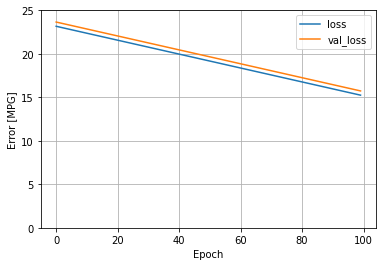

In [19]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 25])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [20]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1
)

3/3 [==============================] - 0s 4ms/step - loss: 16.0293


16.029312133789062

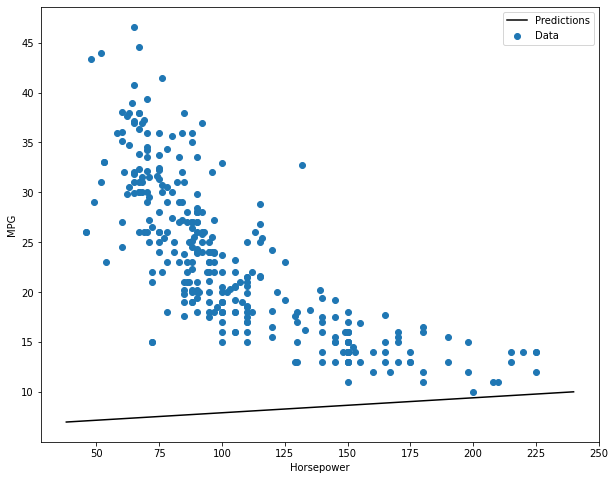

In [21]:
# predict and plot
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)

plot(feature, x, y)

In [22]:
# DNN
dnn_model = keras.Sequential(
    [
     single_feature_normalizer,
     layers.Dense(64, activation='relu'),
     layers.Dense(64, activation='relu'),
     layers.Dense(1)
    ]
)

In [23]:
dnn_model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(0.001))
dnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [24]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 2ms/step - loss: 23.9651


23.965120315551758